<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/130324_fundus_internet_images_laterality_classification_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import numpy as np

In [17]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split')

['train', 'val', 'test']

In [18]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/train')

['RE fundus', 'LE fundus']

In [21]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [37]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                          target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                          target_size=(224,224))

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [38]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(2, activation='softmax')])

model.compile(optimizer = "rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(trainimages,
          batch_size = 10,
          epochs = 10,
          validation_data = validationimages)

model.save('funduslaterality_model.keras')


Epoch 1/10
3/3 [==============================] - 12s 3s/step - loss: 0.4763 - accuracy: 0.9500 - val_loss: 1.2023 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 10s 3s/step - loss: 0.6530 - accuracy: 0.6250 - val_loss: 0.5437 - val_accuracy: 0.8000
Epoch 3/10
3/3 [==============================] - 10s 2s/step - loss: 0.3803 - accuracy: 0.9750 - val_loss: 0.8181 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 11s 2s/step - loss: 0.5387 - accuracy: 0.6000 - val_loss: 0.5073 - val_accuracy: 0.9000
Epoch 5/10
3/3 [==============================] - 11s 4s/step - loss: 0.3087 - accuracy: 0.9625 - val_loss: 0.5096 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 20s 8s/step - loss: 0.2654 - accuracy: 0.9500 - val_loss: 0.5040 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 14s 3s/step - loss: 0.2086 - accuracy: 0.9375 - val_loss: 0.8114 - val_accuracy: 0.7000
Epoch 8/10
3/3 [==================

In [67]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 0s 354ms/step


array([[1.1165784e-01, 8.8834208e-01],
       [2.1950582e-02, 9.7804946e-01],
       [7.6218545e-01, 2.3781452e-01],
       [1.1843413e-01, 8.8156587e-01],
       [1.1993053e-01, 8.8006943e-01],
       [2.6046863e-04, 9.9973953e-01],
       [3.5892197e-01, 6.4107805e-01],
       [1.6599970e-03, 9.9834007e-01],
       [6.3515769e-04, 9.9936491e-01],
       [5.9407344e-03, 9.9405932e-01]], dtype=float32)

In [68]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [69]:
testimages.class_indices

{'LE fundus': 0, 'RE fundus': 1}

In [70]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [71]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[1, 4],
       [0, 5]])

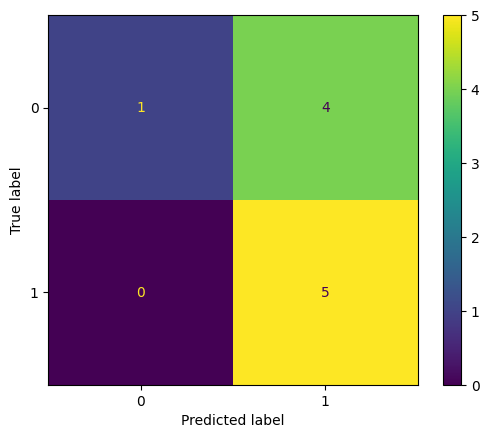

In [72]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [73]:
from sklearn import metrics
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



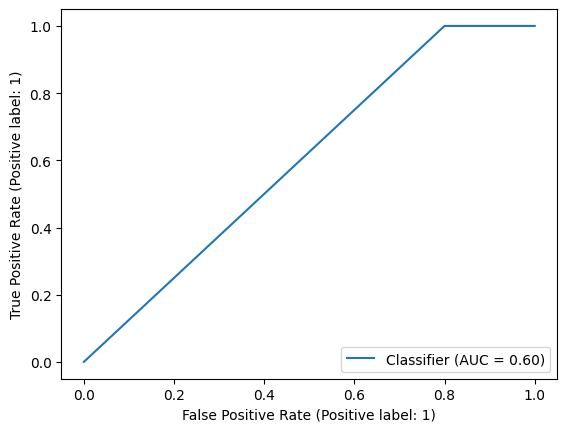

In [74]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)